In [1]:
library(data.table)

In [2]:
library(fmsb)

In [3]:
library(ggplot2)

In [4]:
longitudinal_misalignment <- read.table("../../../results/misalignment_and_edits_10_17_post_processed.tsv", header=TRUE, sep="\t")

In [5]:
semi_automated_entity_edits <- read.table("../../../results/semi_automated_entity_edits_post_processed_missing_months_filled_in_manually.tsv", header=TRUE, sep="\t")

In [6]:
summary(semi_automated_entity_edits)

     yyyymm       quickstatements_edits petscan_edits    autolist2_edits 
 Min.   :201212   Min.   :      0       Min.   :     0   Min.   :     0  
 1st Qu.:201401   1st Qu.:      0       1st Qu.:     0   1st Qu.:     0  
 Median :201502   Median :      0       Median :     0   Median :     0  
 Mean   :201475   Mean   : 170728       Mean   : 67141   Mean   : 35403  
 3rd Qu.:201604   3rd Qu.: 245536       3rd Qu.:  3321   3rd Qu.:     0  
 Max.   :201705   Max.   :1351884       Max.   :905364   Max.   :447625  
 autoedit_edits  labellister_edits itemcreator_edits dragrefjs_edits 
 Min.   :    0   Min.   :   0      Min.   :    0     Min.   :   0.0  
 1st Qu.: 2796   1st Qu.:1273      1st Qu.:    0     1st Qu.:   0.0  
 Median : 3465   Median :1931      Median :    0     Median :   0.0  
 Mean   : 3691   Mean   :1767      Mean   : 1494     Mean   : 468.3  
 3rd Qu.: 4283   3rd Qu.:2208      3rd Qu.:    0     3rd Qu.: 303.5  
 Max.   :18527   Max.   :4215      Max.   :42957     Max.   :5

In [7]:
summary(longitudinal_misalignment)

     yyyymm       aligned_entities difference_in_alignment_with_previous
 Min.   :201211   Min.   :0.4443   Min.   :-0.0510158                   
 1st Qu.:201356   1st Qu.:0.4869   1st Qu.:-0.0141284                   
 Median :201502   Median :0.5656   Median :-0.0079630                   
 Mean   :201470   Mean   :0.6260   Mean   : 0.0080788                   
 3rd Qu.:201604   3rd Qu.:0.7723   3rd Qu.:-0.0003932                   
 Max.   :201705   Max.   :0.9063   Max.   : 0.7595628                   
   bot_edits        semi_automated_edits non_bot_edits       anon_edits   
 Min.   :     700   Min.   :      0      Min.   : 170872   Min.   :  507  
 1st Qu.: 3282702   1st Qu.:  55931      1st Qu.: 610830   1st Qu.:23099  
 Median : 4779455   Median : 959002      Median : 703269   Median :30159  
 Mean   : 5224443   Mean   :1226123      Mean   : 727614   Mean   :28385  
 3rd Qu.: 6549314   3rd Qu.:2047790      3rd Qu.: 915014   3rd Qu.:34510  
 Max.   :13948677   Max.   :3816710    

In [8]:
first_month_trimmed_longitudinal_misalignment <- longitudinal_misalignment[2:55,]

In [9]:
first_month_trimmed_longitudinal_misalignment$misaligned_over_aligned <- (1 - first_month_trimmed_longitudinal_misalignment$aligned_entities)/first_month_trimmed_longitudinal_misalignment$aligned_entities

In [10]:
first_month_trimmed_longitudinal_misalignment <- merge(first_month_trimmed_longitudinal_misalignment,semi_automated_entity_edits)

In [11]:
first_month_trimmed_longitudinal_misalignment$non_database <- first_month_trimmed_longitudinal_misalignment$mergejs_edits + first_month_trimmed_longitudinal_misalignment$nameguzzler_edits + first_month_trimmed_longitudinal_misalignment$labellister_edits + first_month_trimmed_longitudinal_misalignment$dragrefjs + first_month_trimmed_longitudinal_misalignment$lcjs

In [12]:
first_month_trimmed_longitudinal_misalignment$database <- first_month_trimmed_longitudinal_misalignment$petscan_edits + first_month_trimmed_longitudinal_misalignment$autolist2_edits + first_month_trimmed_longitudinal_misalignment$itemcreator_edits + first_month_trimmed_longitudinal_misalignment$mixnmatch_edits

In [13]:
head(first_month_trimmed_longitudinal_misalignment, n=60)

yyyymm,aligned_entities,difference_in_alignment_with_previous,bot_edits,semi_automated_edits,non_bot_edits,anon_edits,all_edits,current_bot_edits_count,current_semi_automated_edits_count,⋯,dragrefjs_edits,lcjs_edits,wikidatagame_edits,wikidataprimary_edits,mixnmatch_edits,distributedgame_edits,nameguzzler_edits,mergejs_edits,non_database,database
201212,0.8462165,0.0866536670,183629,26104,205220,2789,417742,184329,26104,⋯,0,0,0,0,0,0,0,0,4215,0
201301,0.9062631,0.0600465527,1932349,23753,170872,2215,2129189,2116678,49857,⋯,0,0,0,0,0,0,0,0,2852,0
201302,0.8983001,-0.0079629832,2285161,7616,183937,2066,2478780,4401839,57473,⋯,0,0,0,0,0,0,0,0,1921,0
201303,0.9025090,0.0042089126,2264112,5985,347720,8121,2625938,6665951,63458,⋯,0,0,0,0,0,0,0,0,2140,0
201304,0.8964184,-0.0060905713,8067371,8131,809218,31627,8916347,14733322,71589,⋯,0,0,0,0,0,0,0,0,0,0
201305,0.8769229,-0.0194954899,13276100,0,689197,42572,14007869,28009422,71589,⋯,0,0,0,0,0,0,0,0,0,0
201306,0.8388038,-0.0381190921,13948677,0,833859,41876,14824412,41958099,71589,⋯,0,0,0,0,0,0,0,0,0,0
201307,0.8244444,-0.0143594412,3790208,0,757778,45759,4593745,45748307,71589,⋯,0,0,0,0,0,0,0,0,0,0
201308,0.8256896,0.0012452362,8292090,0,648258,34629,8974977,54040397,71589,⋯,0,0,0,0,0,0,0,0,2228,0
201309,0.8254115,-0.0002781200,4028693,5048,688735,38016,4760492,58069090,76637,⋯,0,0,0,0,0,0,57,3539,3793,0


In [14]:
attach(first_month_trimmed_longitudinal_misalignment)

In [15]:
edit_type_regression <- lm(difference_in_alignment_with_previous ~  
                           scale(quickstatements_edits)
                           + scale(petscan_edits)
                           + scale(autolist2_edits)
                           + scale(autoedit_edits)
                           + scale(labellister_edits)
                           + scale(itemcreator_edits)
                           + scale(dragrefjs_edits)
                           + scale(lcjs_edits)
                           + scale(wikidatagame_edits)
                           + scale(wikidataprimary_edits)
                           + scale(mixnmatch_edits)
                           + scale(distributedgame_edits)
                           + scale(nameguzzler_edits)
                           + scale(mergejs_edits)
                           + scale(non_database))

In [16]:
summary(edit_type_regression)


Call:
lm(formula = difference_in_alignment_with_previous ~ scale(quickstatements_edits) + 
    scale(petscan_edits) + scale(autolist2_edits) + scale(autoedit_edits) + 
    scale(labellister_edits) + scale(itemcreator_edits) + scale(dragrefjs_edits) + 
    scale(lcjs_edits) + scale(wikidatagame_edits) + scale(wikidataprimary_edits) + 
    scale(mixnmatch_edits) + scale(distributedgame_edits) + scale(nameguzzler_edits) + 
    scale(mergejs_edits) + scale(non_database))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.034095 -0.007753 -0.001248  0.008211  0.048528 

Coefficients: (1 not defined because of singularities)
                               Estimate Std. Error t value Pr(>|t|)    
(Intercept)                  -5.838e-03  2.242e-03  -2.604  0.01297 *  
scale(quickstatements_edits)  1.123e-04  8.049e-03   0.014  0.98894    
scale(petscan_edits)         -2.641e-03  5.887e-03  -0.449  0.65620    
scale(autolist2_edits)        2.181e-03  5.172e-03   0.422  0.67550  

In [30]:
edit_type_regression <- lm(difference_in_alignment_with_previous ~  
                           scale(non_database) + scale(database))

In [31]:
summary(edit_type_regression)


Call:
lm(formula = difference_in_alignment_with_previous ~ scale(non_database) + 
    scale(database))

Residuals:
      Min        1Q    Median        3Q       Max 
-0.042148 -0.007660 -0.001126  0.005853  0.088019 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)  
(Intercept)         -0.005838   0.002666  -2.190   0.0331 *
scale(non_database) -0.004338   0.002835  -1.530   0.1322  
scale(database)      0.002840   0.002835   1.002   0.3213  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.01959 on 51 degrees of freedom
Multiple R-squared:  0.04922,	Adjusted R-squared:  0.01194 
F-statistic:  1.32 on 2 and 51 DF,  p-value: 0.2761


In [19]:
independent_and_dependent_variables = data.table(bot_edits = bot_edits, semi_automated_edits = semi_automated_edits, non_bot_edits = non_bot_edits, anon_edits = anon_edits, difference_in_alignment_with_previous = difference_in_alignment_with_previous)

In [20]:
edit_type_regression_without_anon <- lm(difference_in_alignment_with_previous ~ scale(bot_edits) + scale(semi_automated_edits) + scale(non_bot_edits))

In [21]:
anon_residuals = data.frame(month=as.Date(paste(yyyymm, "01", sep=""), format="%Y%m%d"), anon_edits = anon_edits, residuals= edit_type_regression_without_anon$residuals)

In [22]:
summary(anon_residuals)

     month              anon_edits      residuals         
 Min.   :2012-12-01   Min.   : 2066   Min.   :-0.0490778  
 1st Qu.:2014-01-08   1st Qu.:24126   1st Qu.:-0.0083781  
 Median :2015-02-15   Median :30362   Median : 0.0004907  
 Mean   :2015-02-15   Mean   :28901   Mean   : 0.0000000  
 3rd Qu.:2016-03-24   3rd Qu.:34526   3rd Qu.: 0.0061725  
 Max.   :2017-05-01   Max.   :47741   Max.   : 0.0702770  

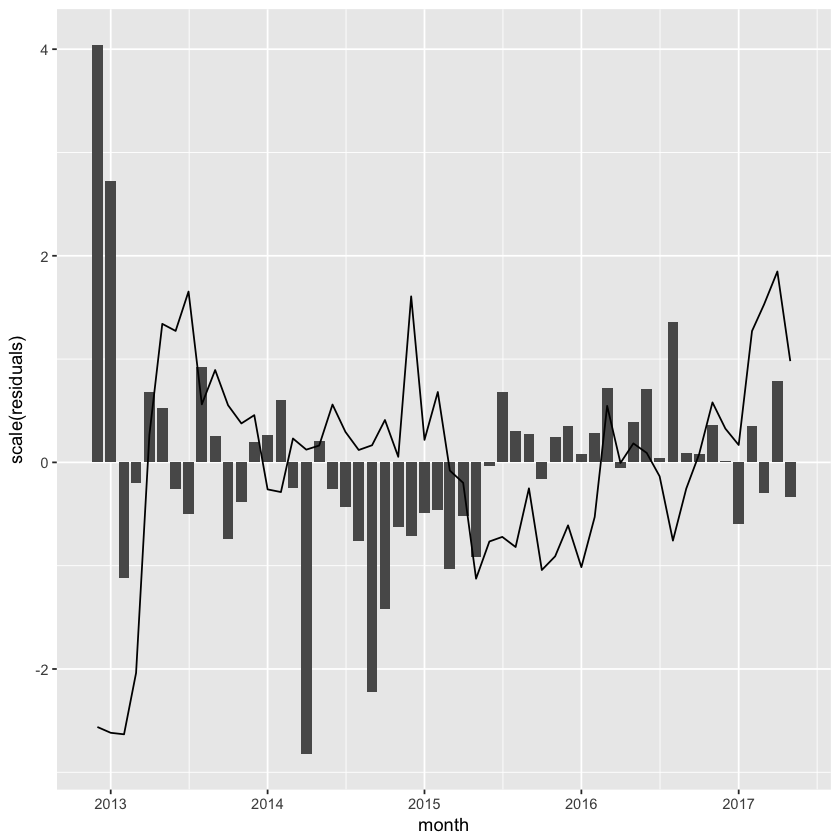

In [23]:
ggplot(anon_residuals, aes(x=month, y=scale(residuals))) + geom_bar(stat="identity") + geom_line(aes(y=scale(anon_edits)))

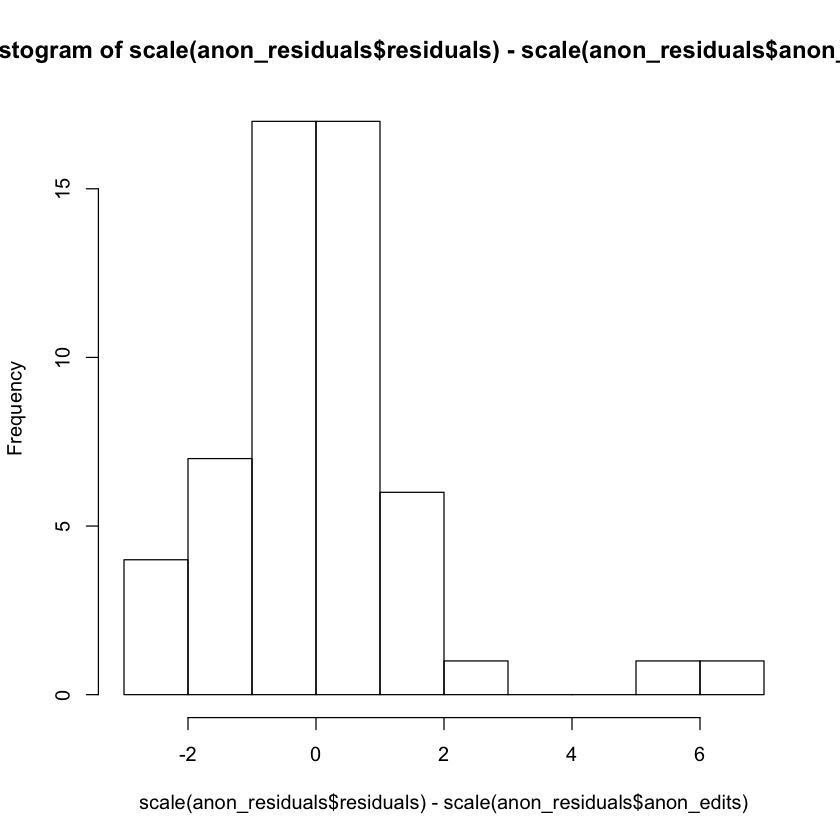

In [24]:
hist(scale(anon_residuals$residuals)- scale(anon_residuals$anon_edits))

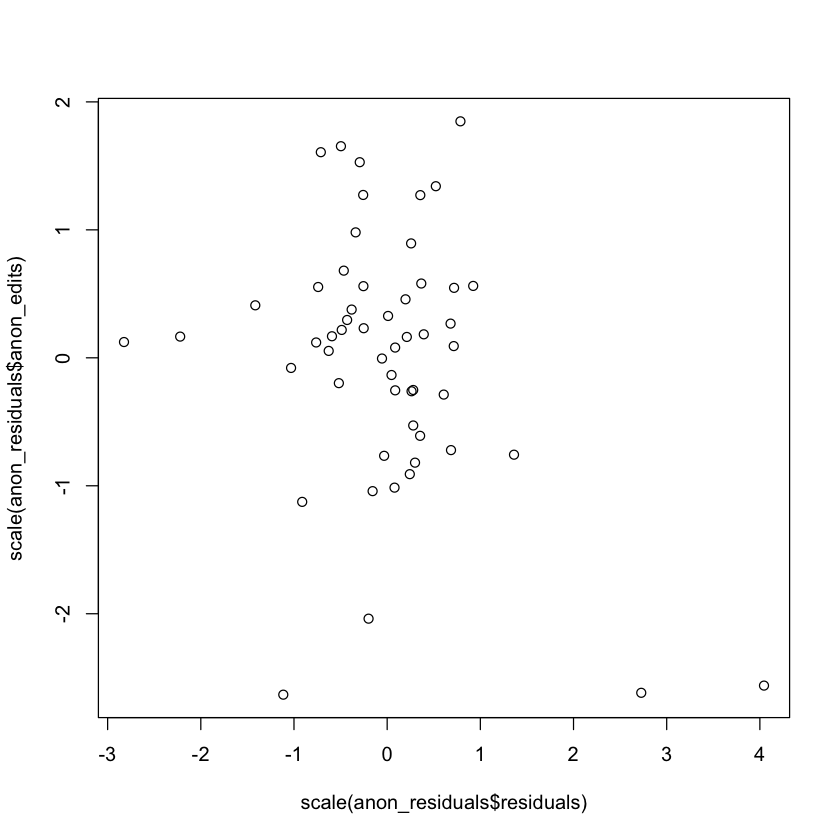

In [25]:
plot(scale(anon_residuals$residuals), scale(anon_residuals$anon_edits))

In [26]:
cor(independent_and_dependent_variables, method="spearman")

,bot_edits,semi_automated_edits,non_bot_edits,anon_edits,difference_in_alignment_with_previous
bot_edits,1.0000000,-0.12531453,0.1382504,0.31602821,-0.3576520
semi_automated_edits,-0.1253145,1.00000000,0.6152116,-0.03141441,0.2071674
non_bot_edits,0.1382504,0.61521160,1.0000000,0.23186583,0.1637888
anon_edits,0.3160282,-0.03141441,0.2318658,1.00000000,-0.3553650
difference_in_alignment_with_previous,-0.3576520,0.20716737,0.1637888,-0.35536497,1.0000000


In [27]:
VIF(edit_type_regression)

[1] 1.031483

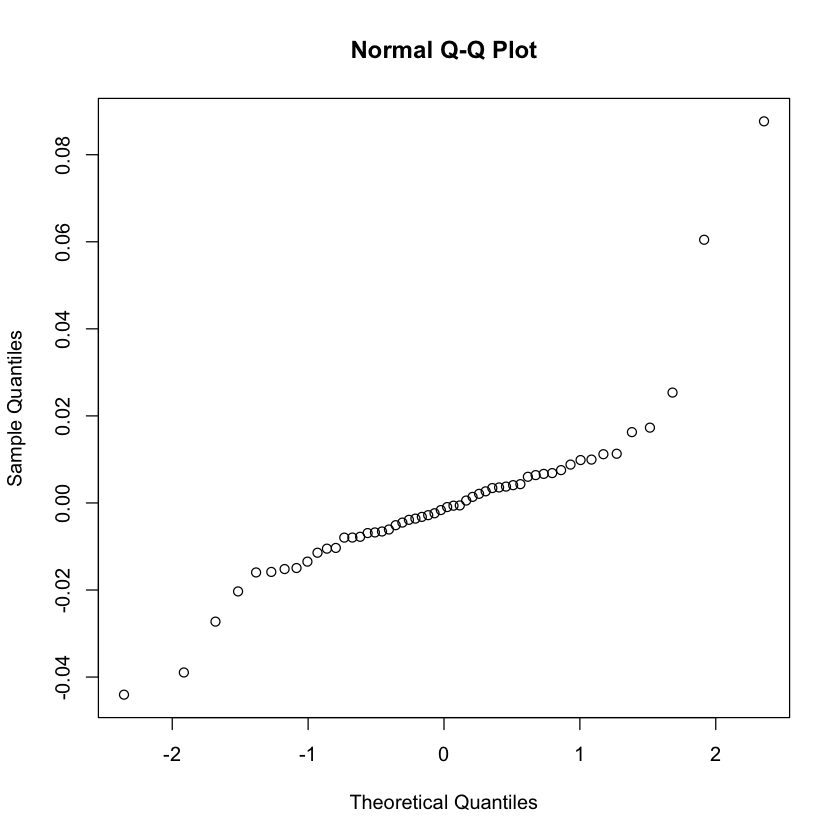

In [28]:
qqnorm(edit_type_regression$residuals)

In [29]:
names(edit_type_regression)

[1] "coefficients"  "residuals"     "effects"       "rank"         
 [5] "fitted.values" "assign"        "qr"            "df.residual"  
 [9] "xlevels"       "call"          "terms"         "model"